MAD Graphs for Patient 9

In [1]:
# Import Modules
import sys
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat

from Modules import Actigraph_Metrics

C:\Users\jakes\AppData\Local\Temp\ipykernel_57008\1130371560.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# signal parameters
freq = 100 #signal is 100hz

# define functions

In [3]:
def sbs_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)

    fig, ax = plt.subplots()
    # Box plot: this version will show the outliers too
    ax.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)
    ax.set_xlabel('SBS Score')
    ax.set_ylabel('MAD')
    return ax, sbs_mad_dict


def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        if mad_list:  # Check if the list is not empty
            quartiles[sbs_value] = {
                'Q1': np.percentile(mad_list, 25),
                'Q2': np.percentile(mad_list, 50),
                'Q3': np.percentile(mad_list, 75),
                '90th Percentile': np.percentile(mad_list, 90)
            }
        else:
            quartiles[sbs_value] = {
                'Q1': np.nan,
                'Q2': np.nan,
                'Q3': np.nan,
                '90th Percentile': np.nan
            }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()
        
    return

# Patient 9

In [5]:
#data_dir = './PatientData/Patient9/'
#data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData/Patient9/'
data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9'

### 5 Min Double-Sided Window

In [6]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient9_5MIN_DSW_AllSBS.mat'
window_size = 100 #100 is 1 second worth of time

# Run all the cells below

In [7]:
# Load 5 Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

26
26
59899


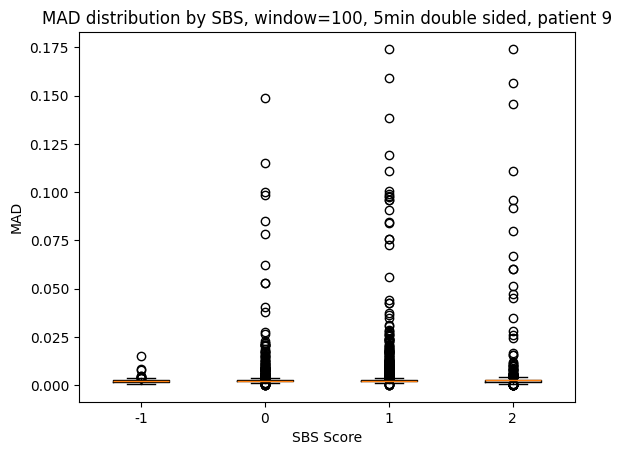

In [8]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=100, 5min double sided, patient 9')
plt.show()

In [118]:
report_quartiles(sbs_mad_dict)

SBS Score: -1
Q1: 0.00175332619606694
Q2 (Median): 0.002227089636786417
Q3: 0.002509122868846525
90th Percentile: 0.002730426121570151

SBS Score: 0
Q1: 0.0019621993122866943
Q2 (Median): 0.002311867551677671
Q3: 0.0026790059194408133
90th Percentile: 0.003077308838542181

SBS Score: 1
Q1: 0.001909726850561011
Q2 (Median): 0.0022564969399714307
Q3: 0.0026328034068234807
90th Percentile: 0.00300519391009918

SBS Score: 2
Q1: 0.001839984069009315
Q2 (Median): 0.0024877100256710527
Q3: 0.002729891197248202
90th Percentile: 0.002908495926880717



599


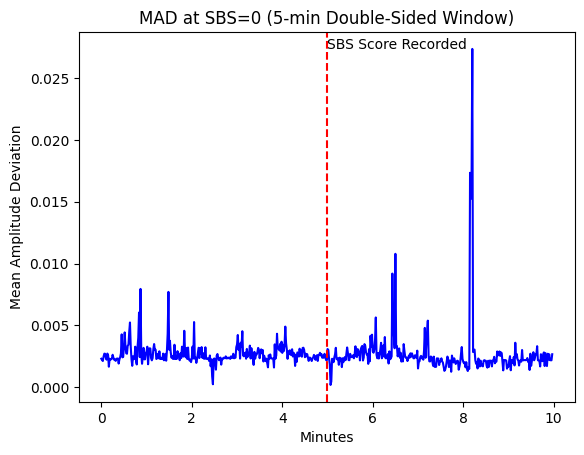

599


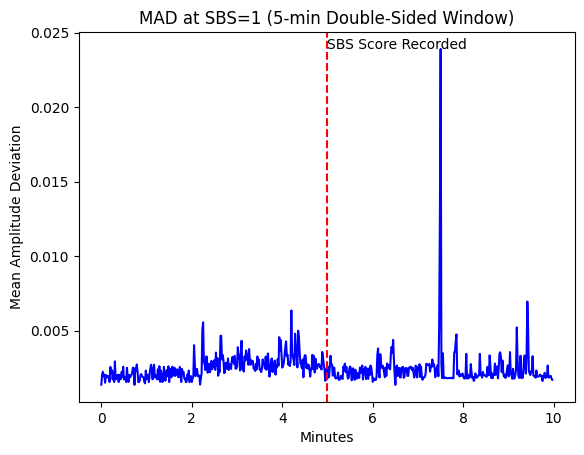

599


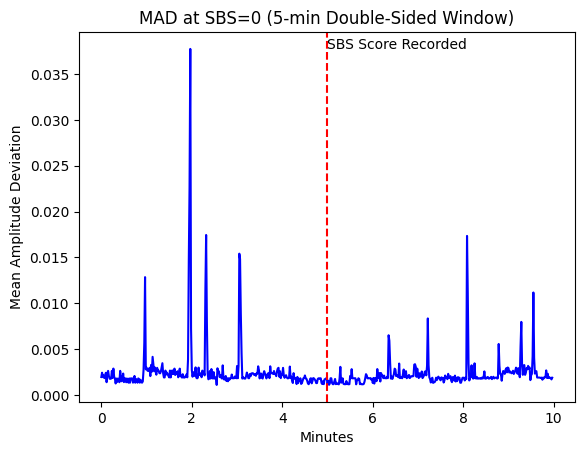

599


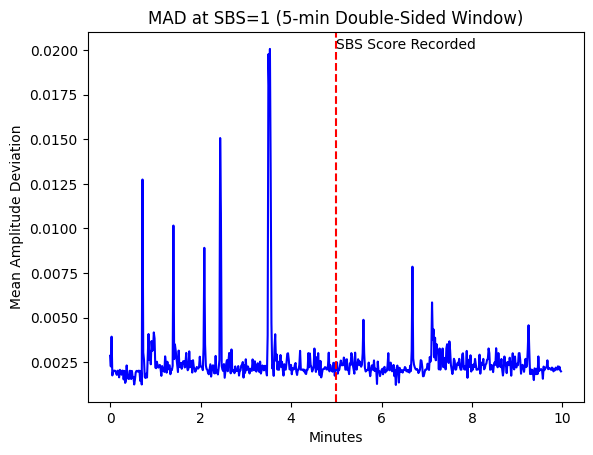

599


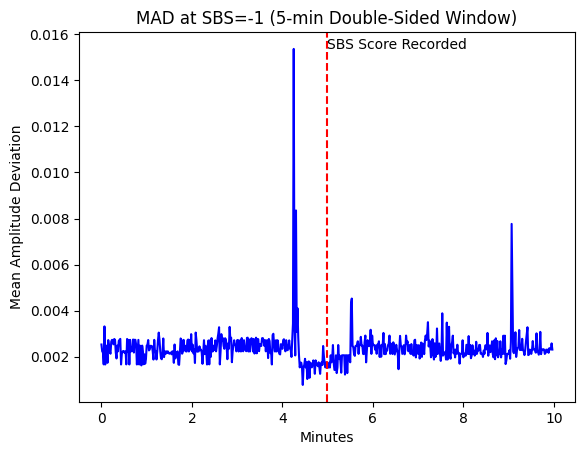

599


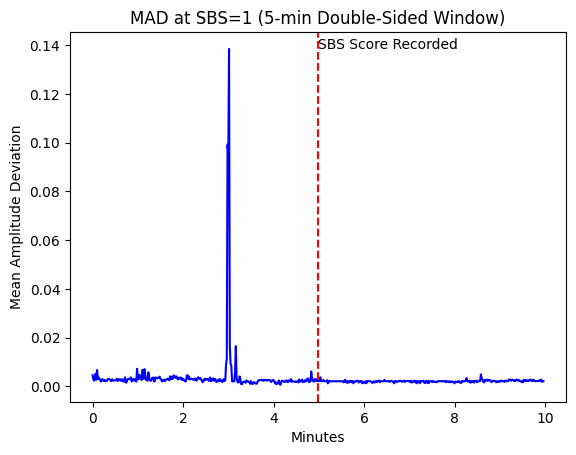

599


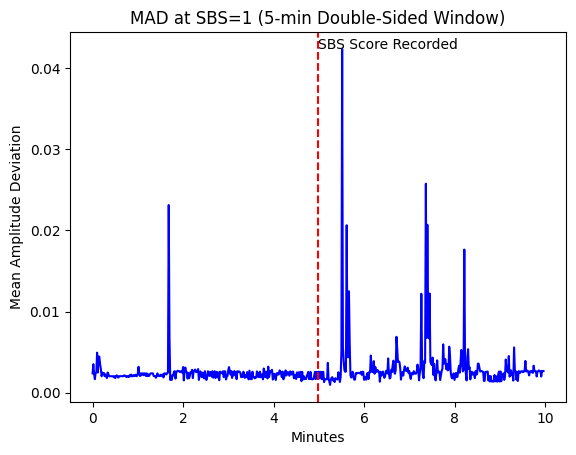

599


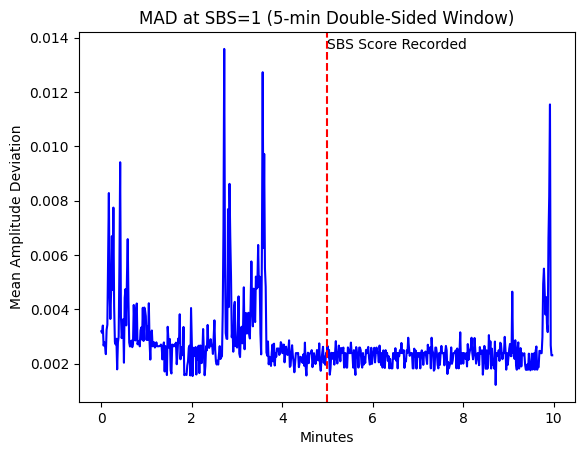

599


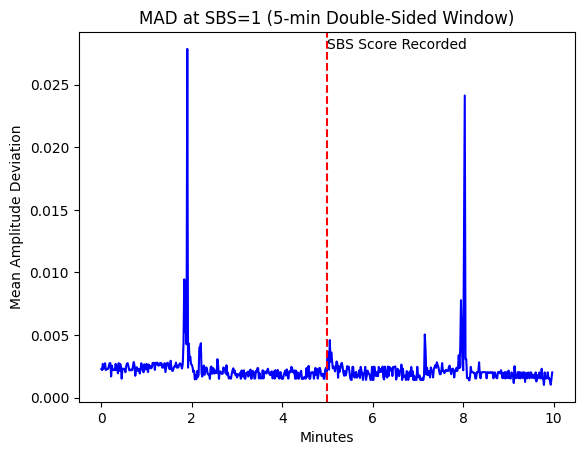

599


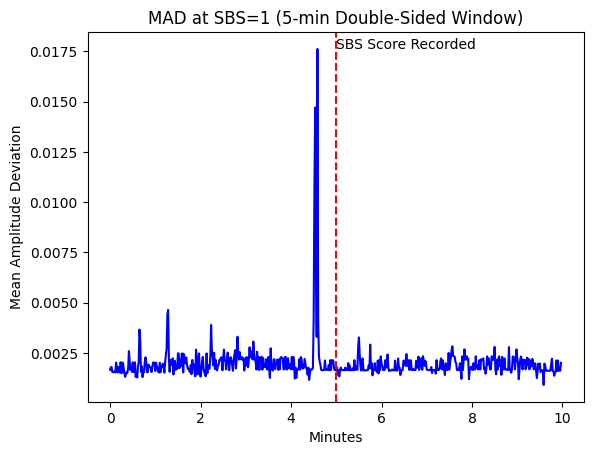

599


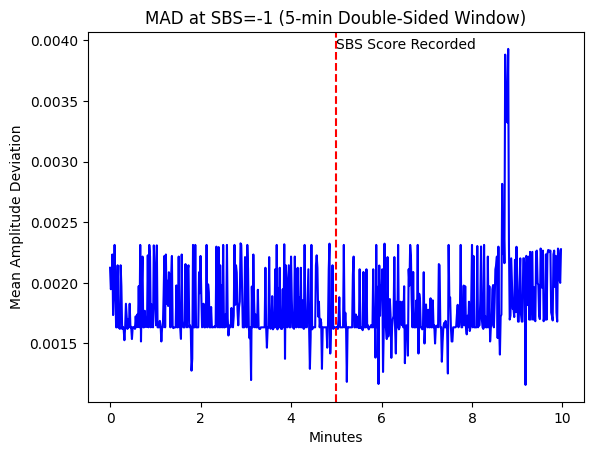

599


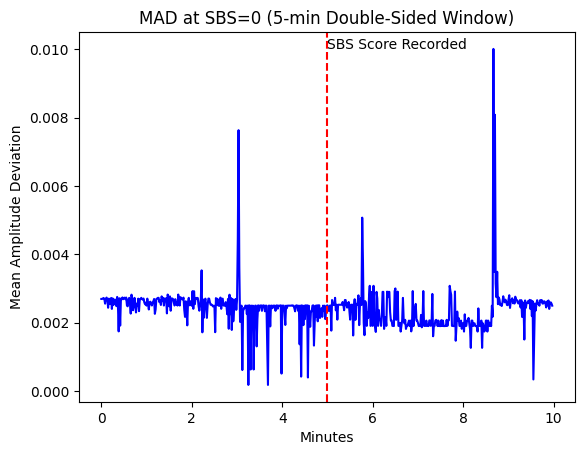

599


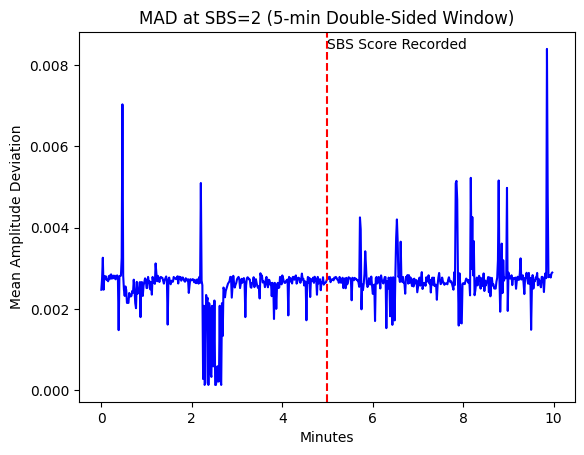

599


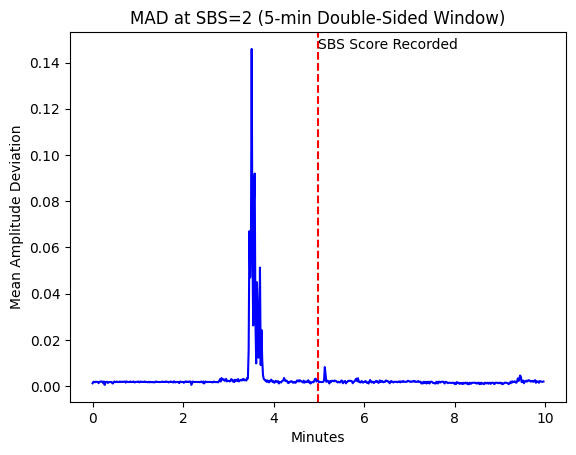

599


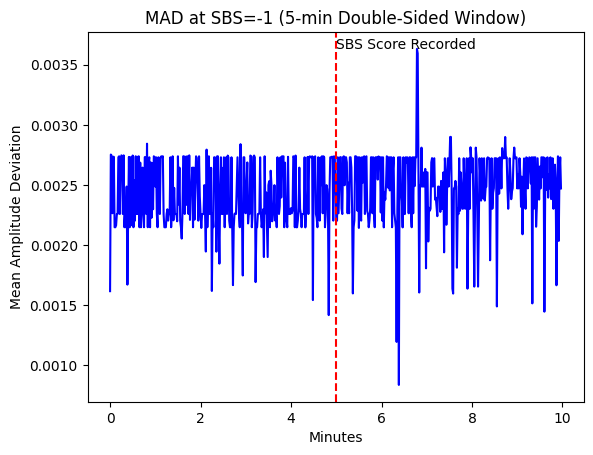

599


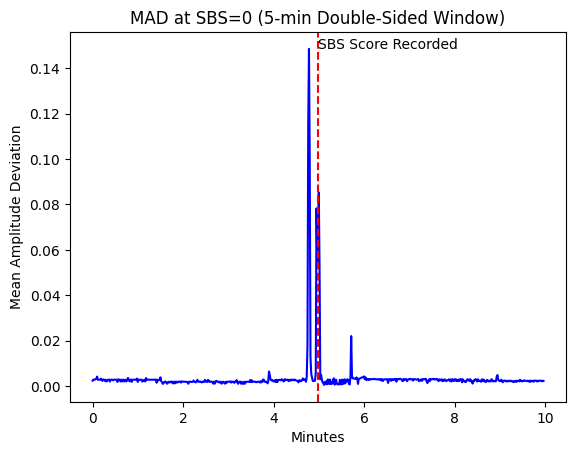

599


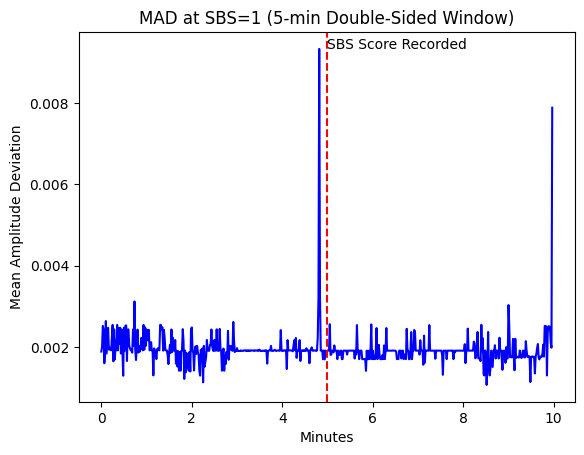

599


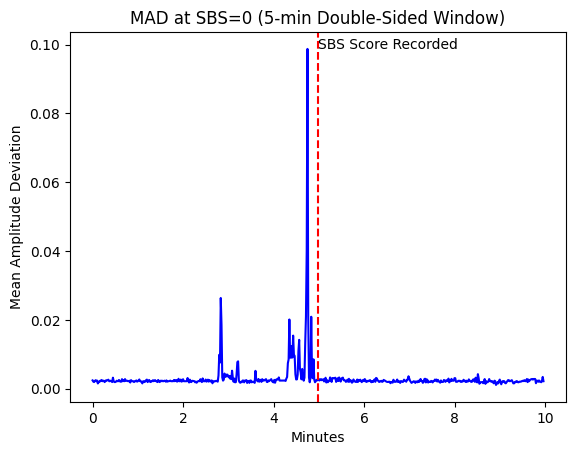

599


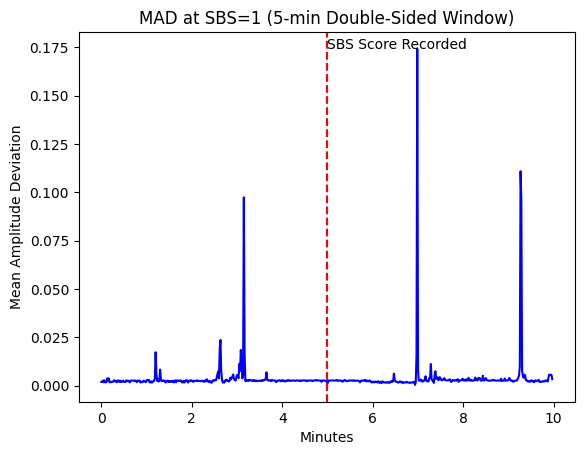

599


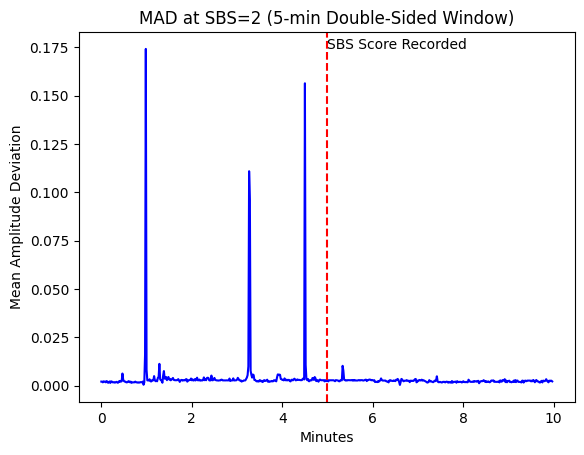

599


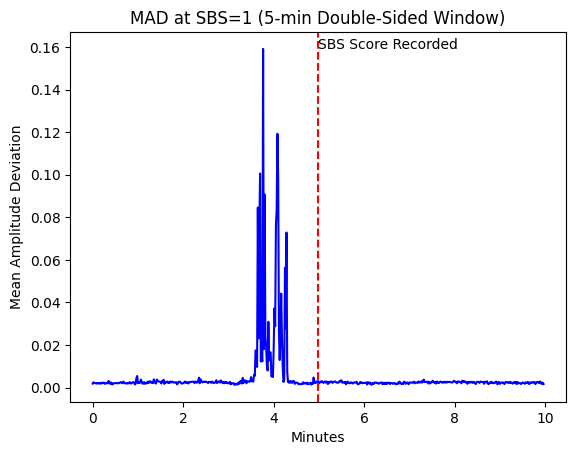

599


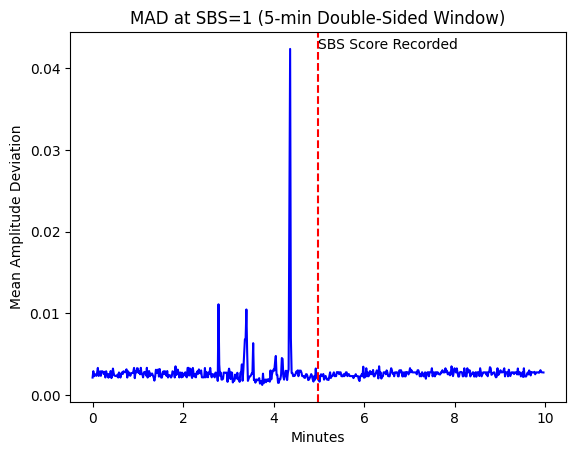

599


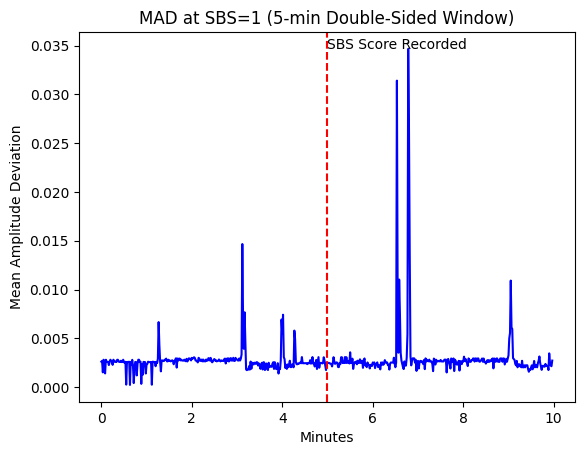

599


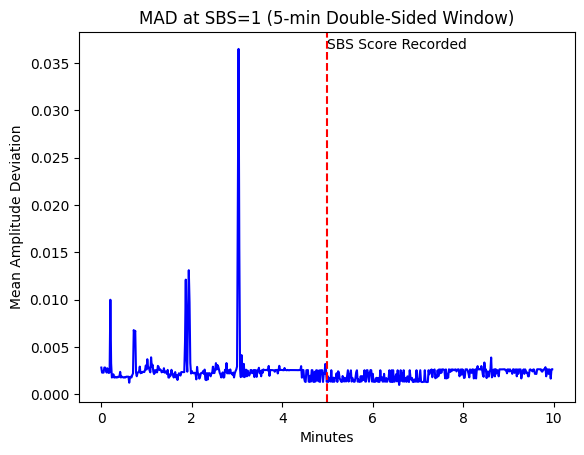

599


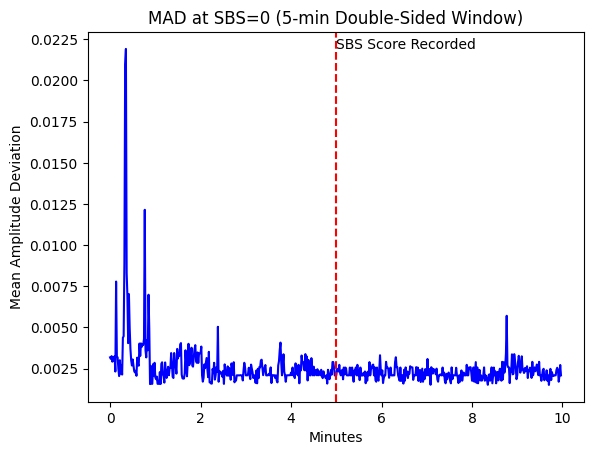

599


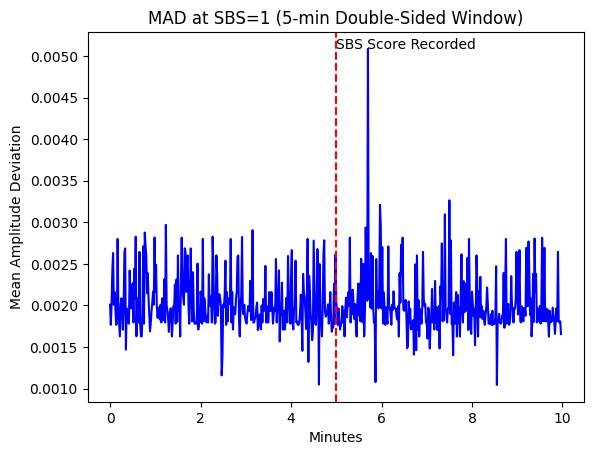

In [119]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline(t[len(t)//2], color='red', linestyle='--')
    plt.text(t[len(t)//2], max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (5-min Double-Sided Window)')
    
    # save plots
    folder_path = './AnalysisResults/Patient9_5MIN_DSW'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()

### 10 Minute - 5 Minute Double-Sided Window

In [120]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient9_10MIN_5MIN_DSW_AllSBS.mat'
window_size = 100 #100 is 1 second worth of time

# Run all the cells below

In [121]:
# Load 10-Min, 5-Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

26
26
89899


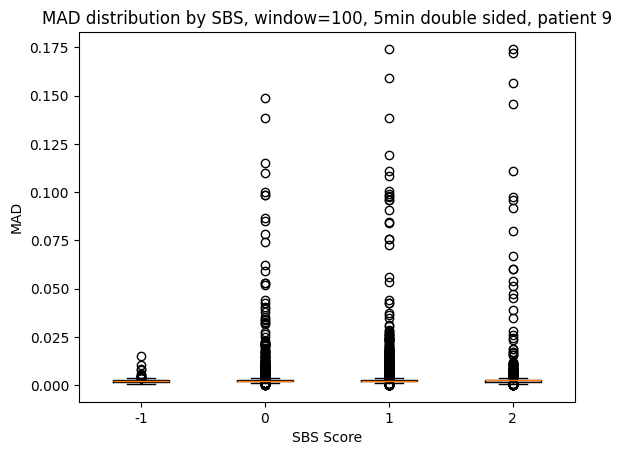

In [122]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=100, 5min double sided, patient 9')
plt.show()

In [123]:
report_quartiles(sbs_mad_dict)

SBS Score: -1
Q1: 0.0017961544168900723
Q2 (Median): 0.002228724057896203
Q3: 0.0025195486704998604
90th Percentile: 0.0027361930186294626

SBS Score: 0
Q1: 0.001996651660419513
Q2 (Median): 0.002329411254872238
Q3: 0.002686863396611061
90th Percentile: 0.0030860530495368296

SBS Score: 1
Q1: 0.0019165126599831606
Q2 (Median): 0.002264078125350899
Q3: 0.002623966033507452
90th Percentile: 0.0029824248127748865

SBS Score: 2
Q1: 0.0018983471358891002
Q2 (Median): 0.0024936843322582725
Q3: 0.00272651881516639
90th Percentile: 0.0029122556881784334



899


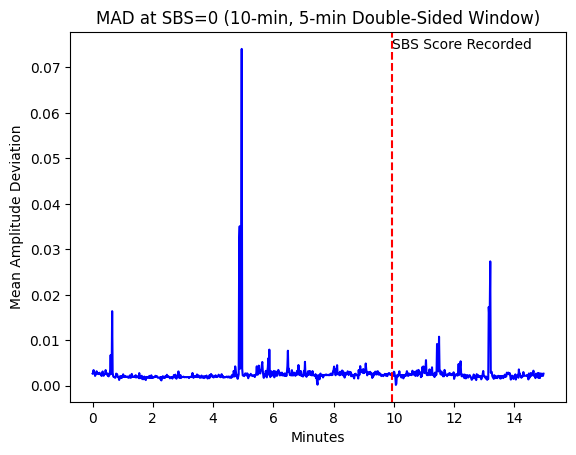

899


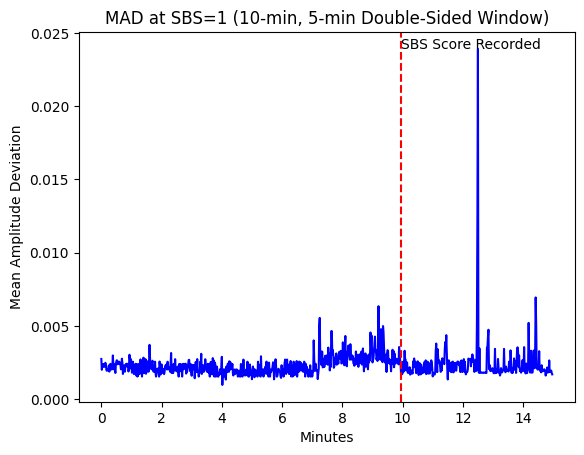

899


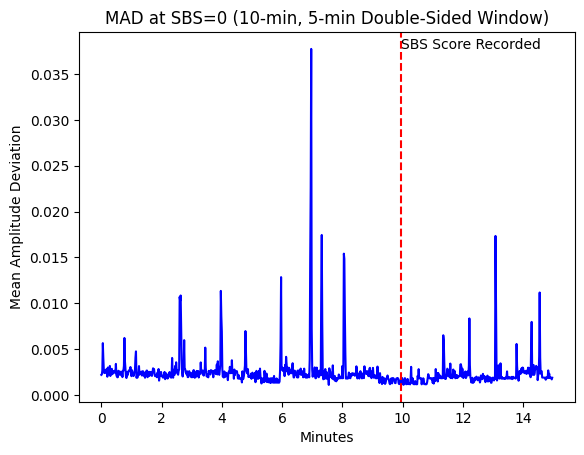

899


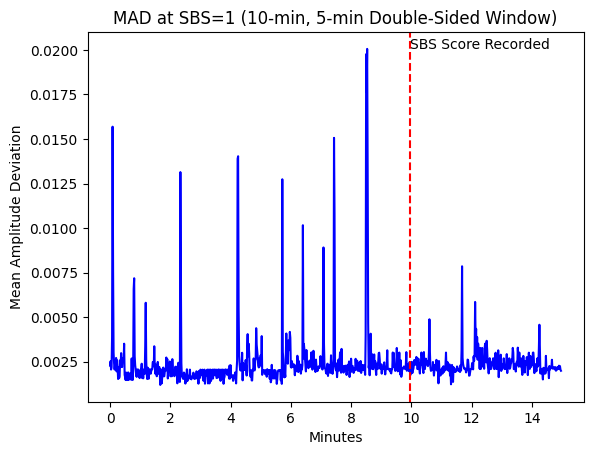

899


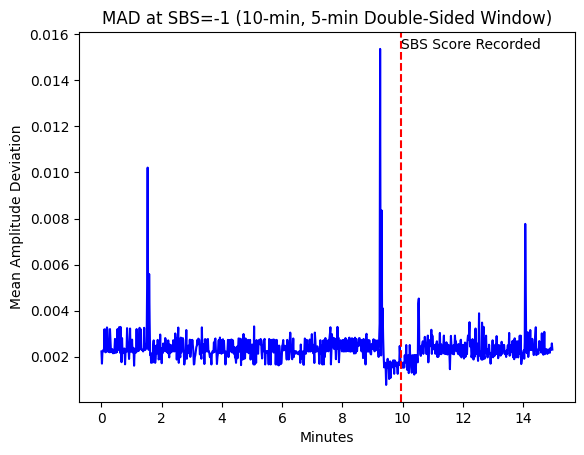

899


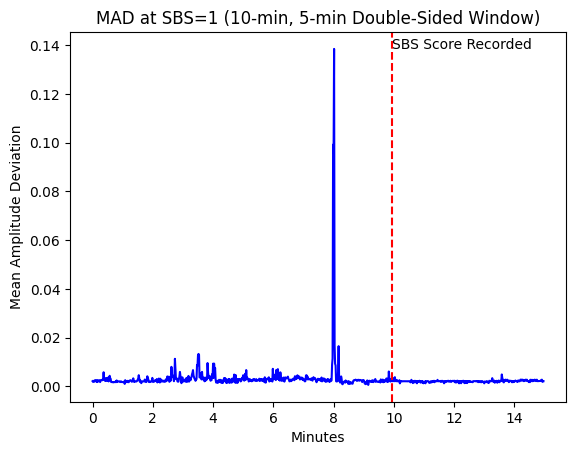

899


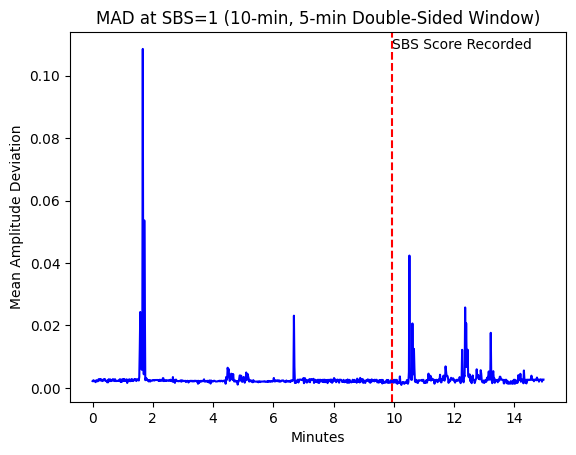

899


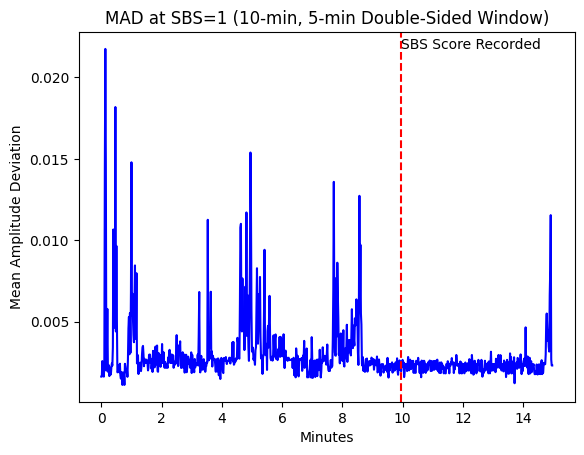

899


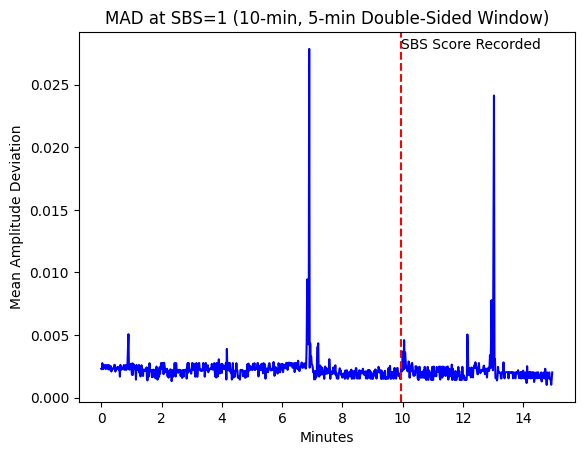

899


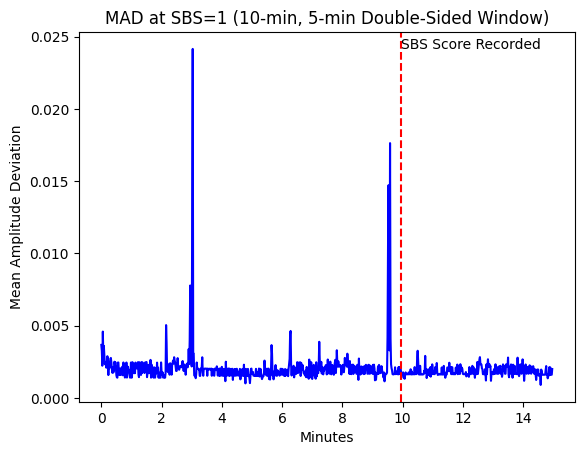

899


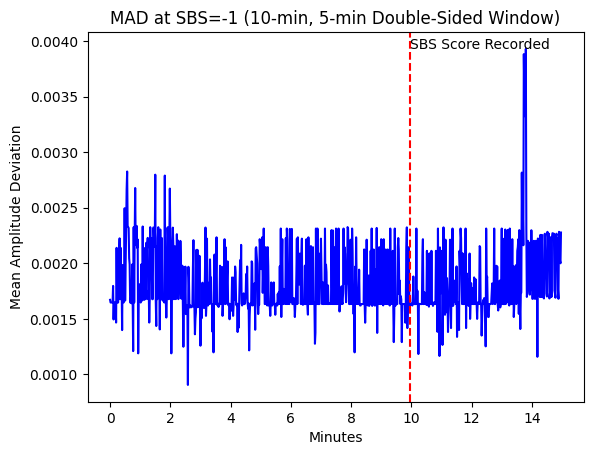

899


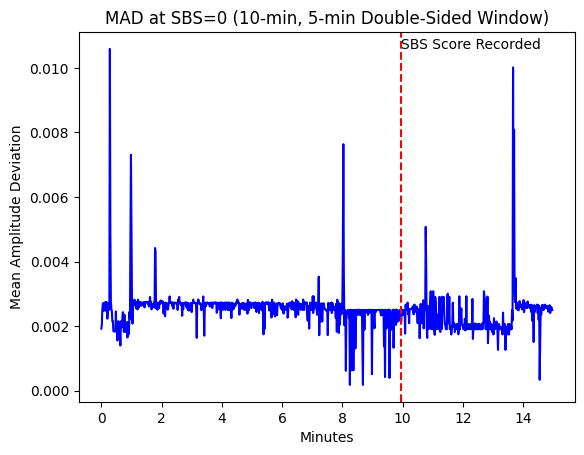

899


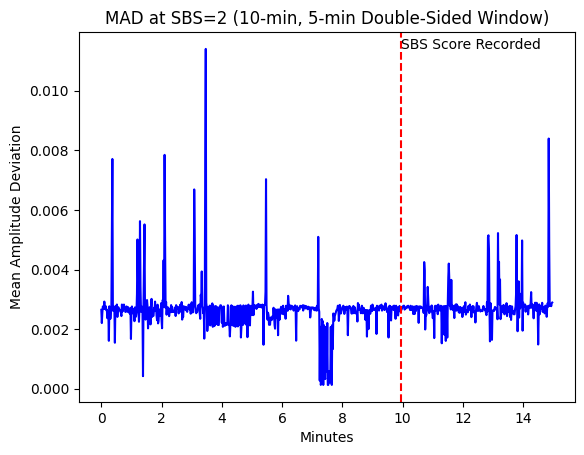

899


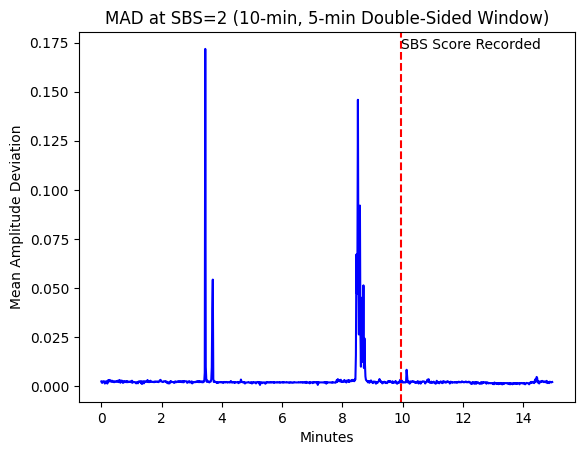

899


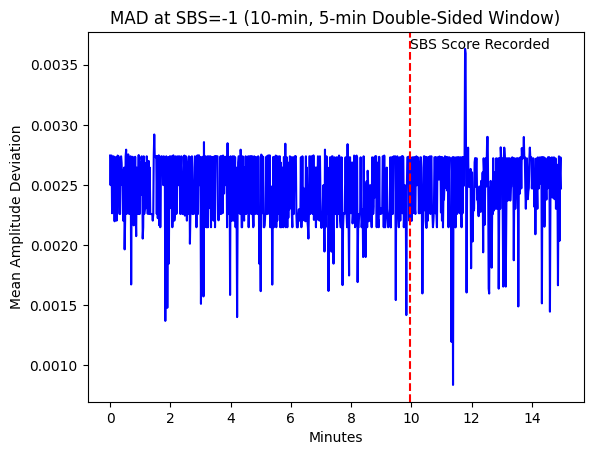

899


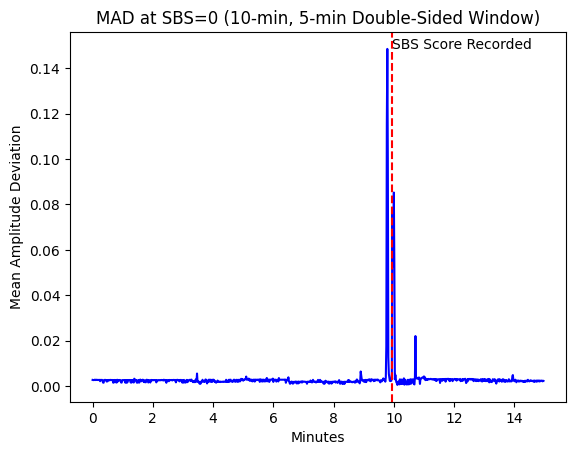

899


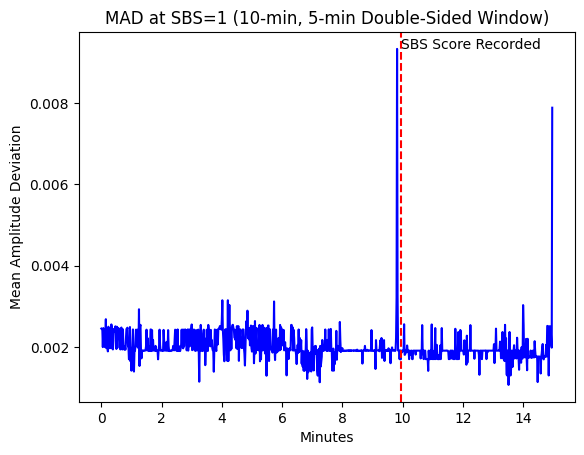

899


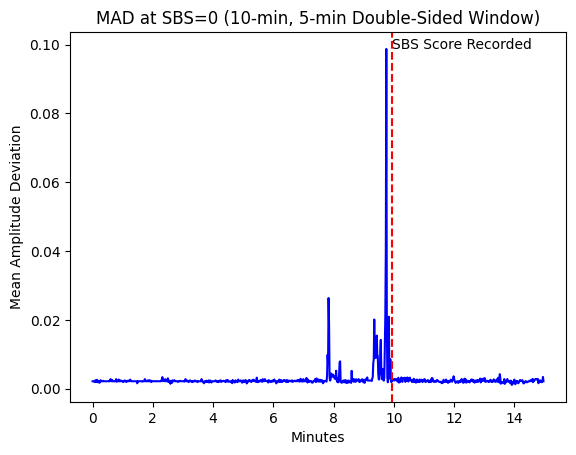

899


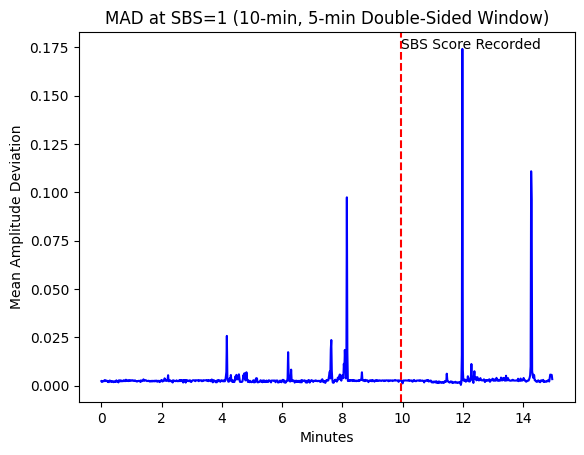

899


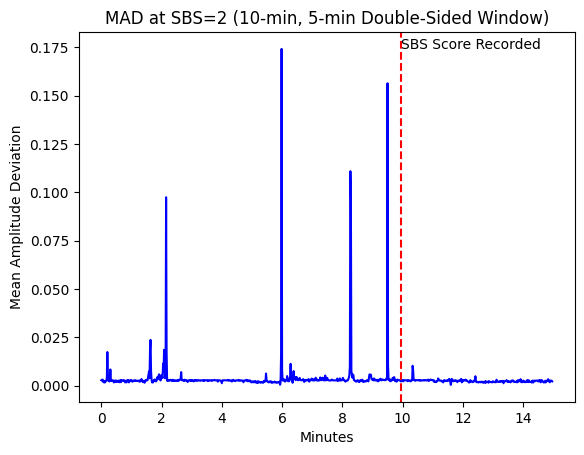

899


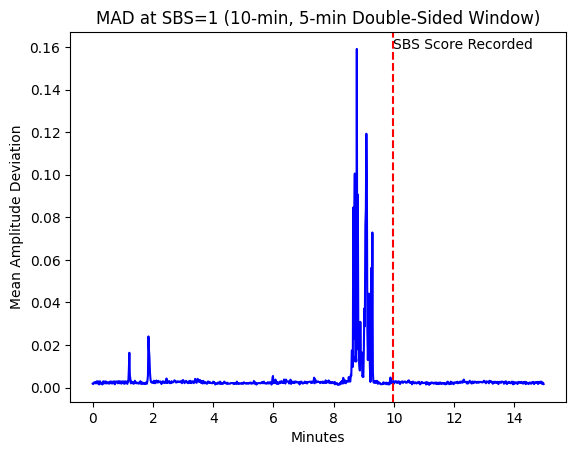

899


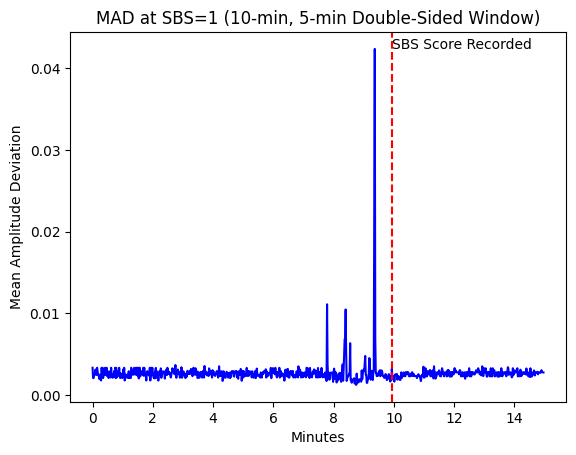

899


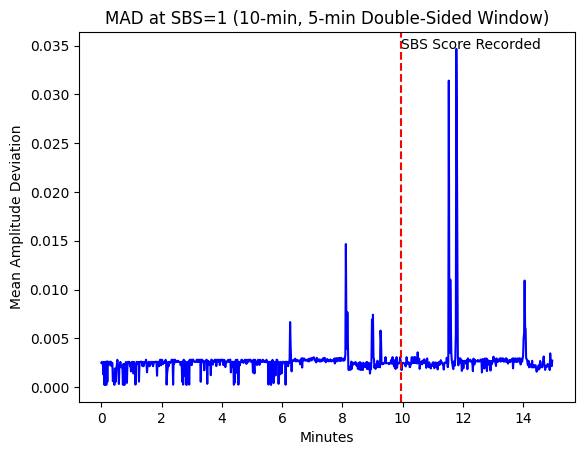

899


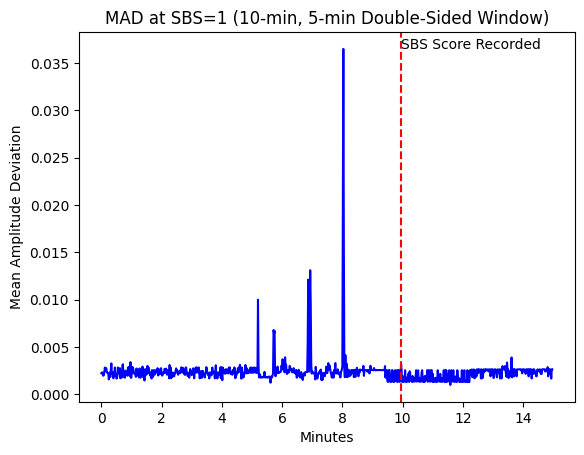

899


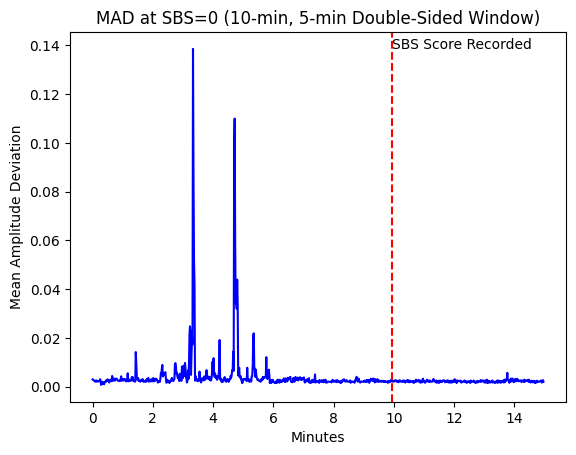

899


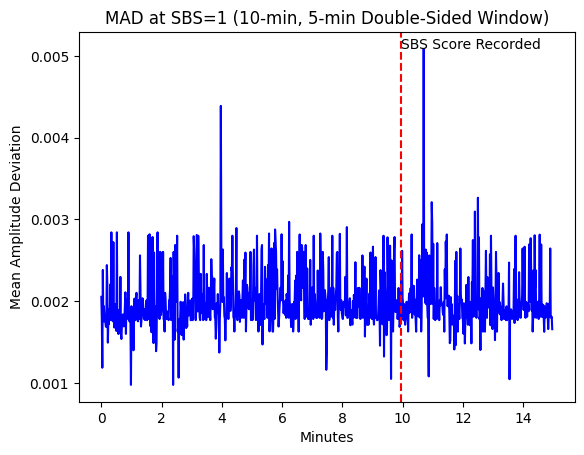

In [124]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline((t[len(t)//2]*1.33), color='red', linestyle='--')
    plt.text((t[len(t)//2]*1.33), max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (10-min, 5-min Double-Sided Window)')
    
    # save plots
    folder_path = './AnalysisResults/Patient9_10MIN_5MIN_DSW'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()

### 15 Min - 5 Minute Double-Sided Window

In [125]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient9_15MIN_5MIN_DSW_AllSBS.mat'
window_size = 100 #100 is 1 second worth of time

# Run all the cells below

In [126]:
# Load 10-Min, 5-Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

26
26
119899


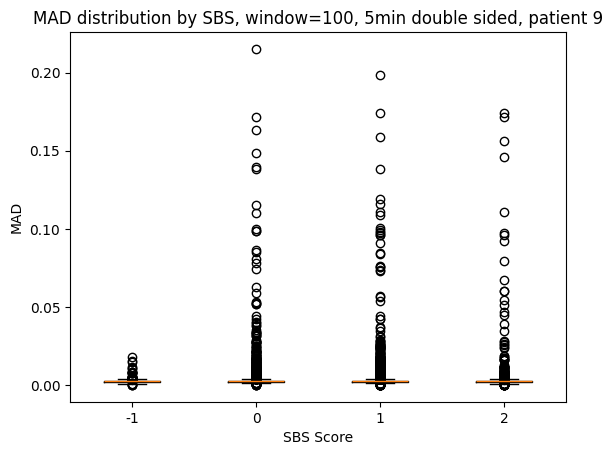

In [127]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=100, 5min double sided, patient 9')
plt.show()

In [128]:
report_quartiles(sbs_mad_dict)

SBS Score: -1
Q1: 0.001816078175046032
Q2 (Median): 0.0022167938744845905
Q3: 0.00251537712922989
90th Percentile: 0.0027388088895514695

SBS Score: 0
Q1: 0.0020037938357787
Q2 (Median): 0.0023431679983167975
Q3: 0.0026990835340499064
90th Percentile: 0.0031782588545530063

SBS Score: 1
Q1: 0.0019412415499169278
Q2 (Median): 0.0022707148348268813
Q3: 0.002603699716552166
90th Percentile: 0.002950453534558417

SBS Score: 2
Q1: 0.0019684145852487678
Q2 (Median): 0.0024300194694593102
Q3: 0.0027223134150958783
90th Percentile: 0.0028990232051841593



1199


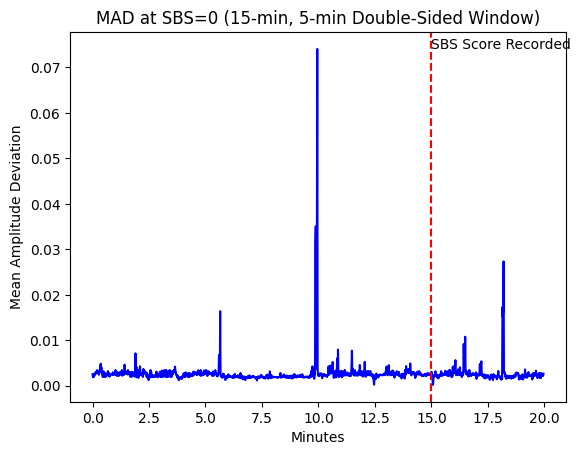

1199


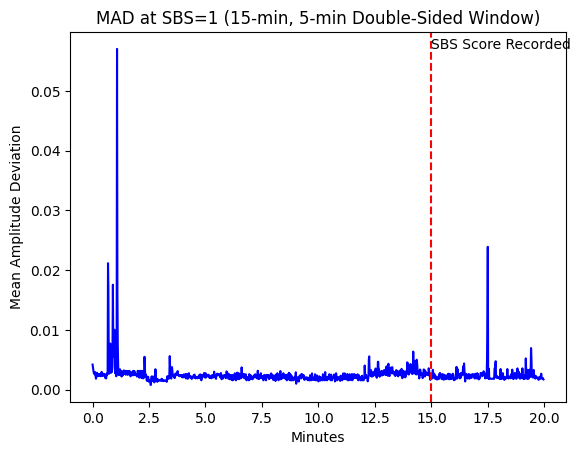

1199


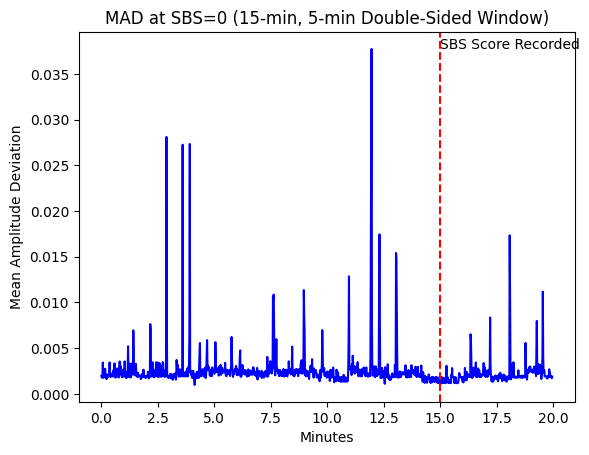

1199


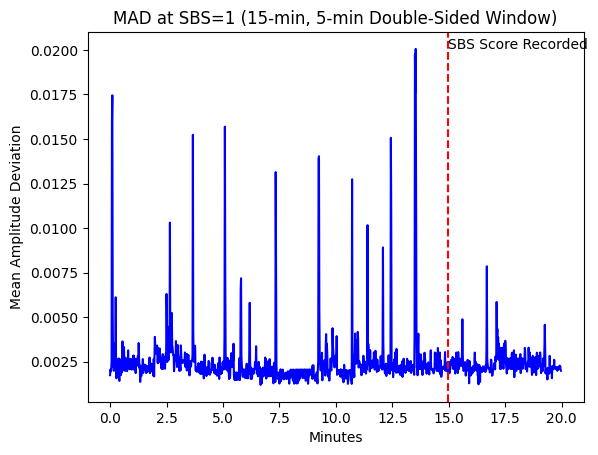

1199


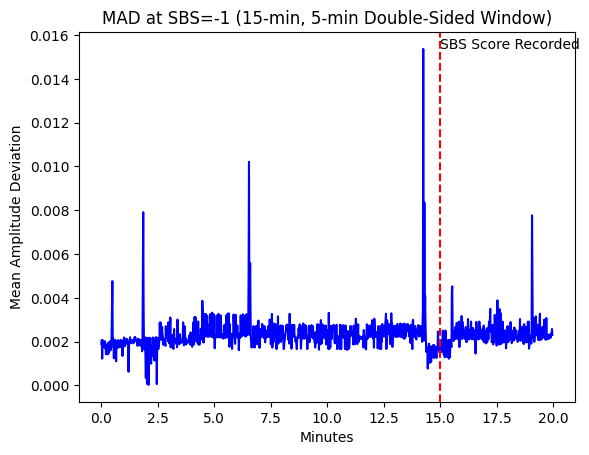

1199


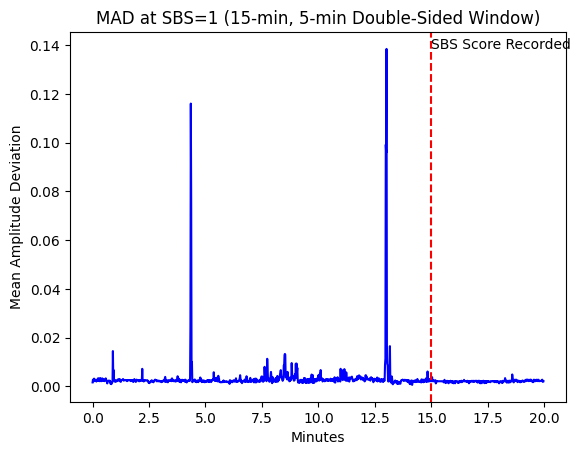

1199


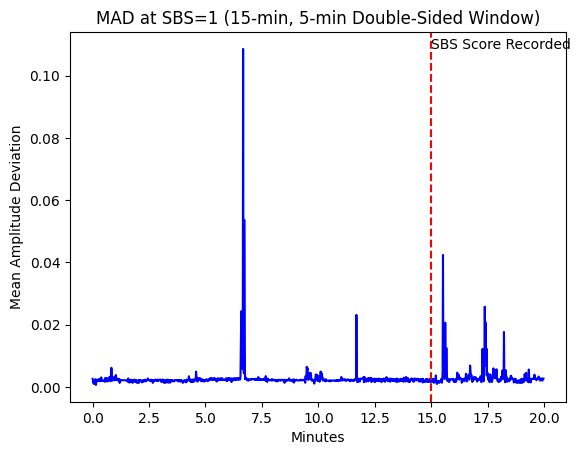

1199


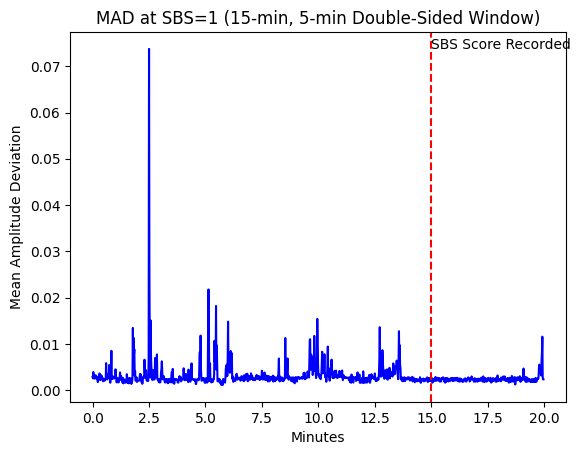

1199


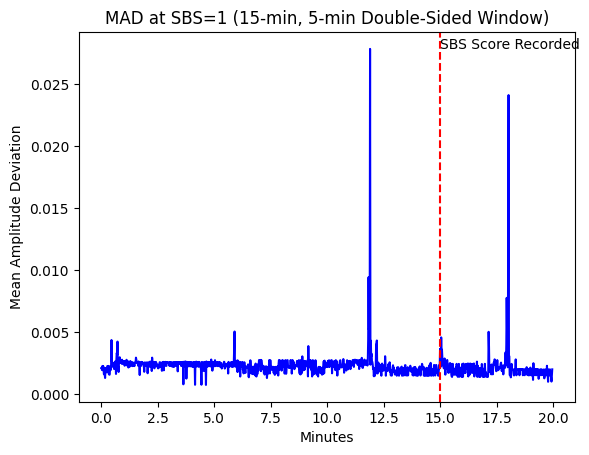

1199


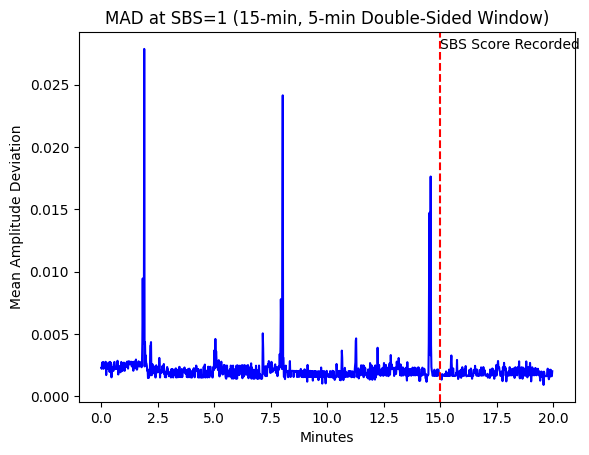

1199


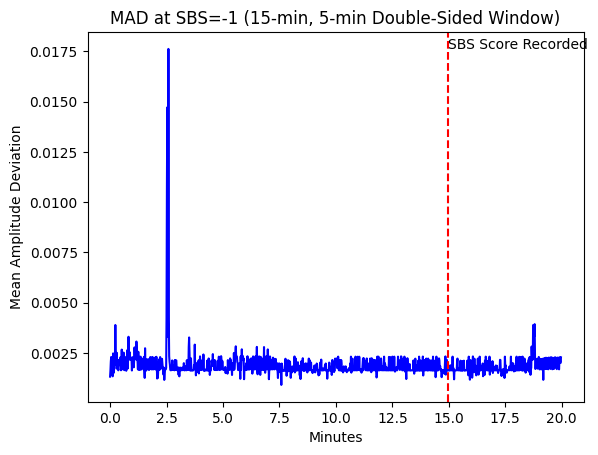

1199


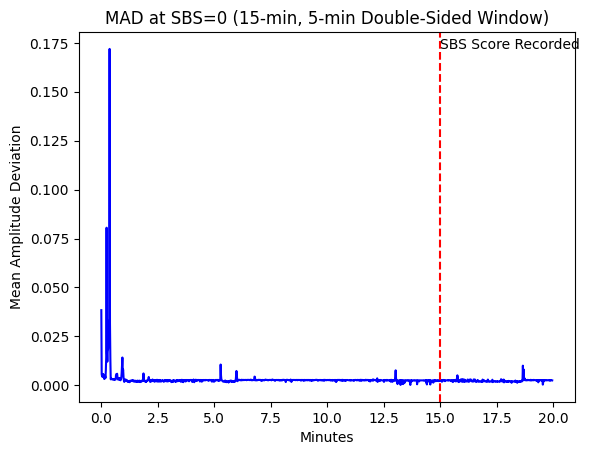

1199


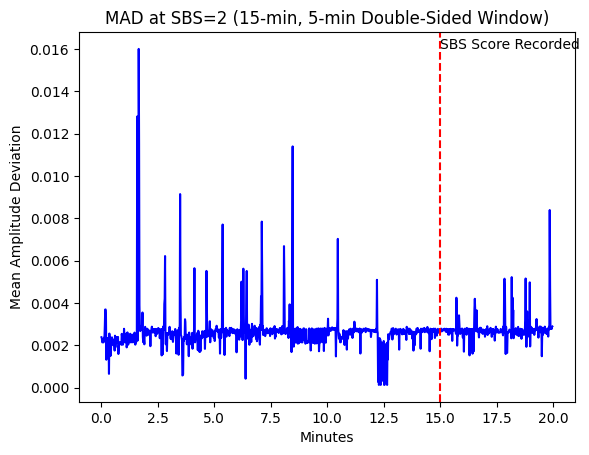

1199


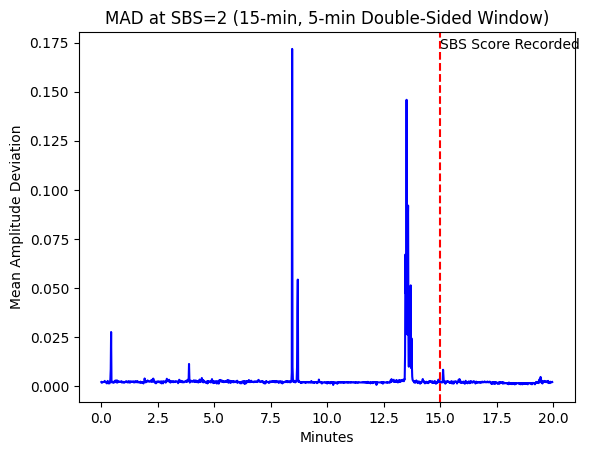

1199


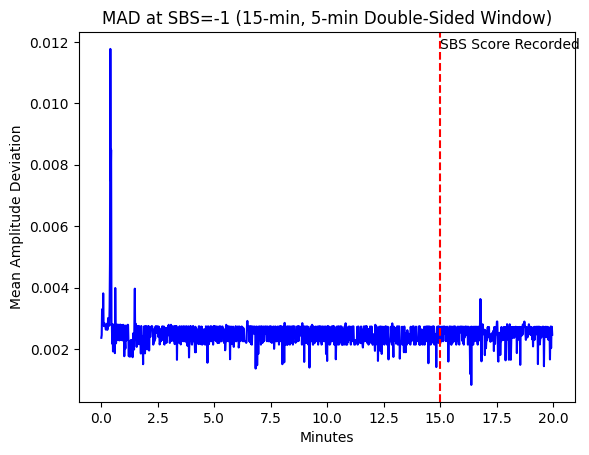

1199


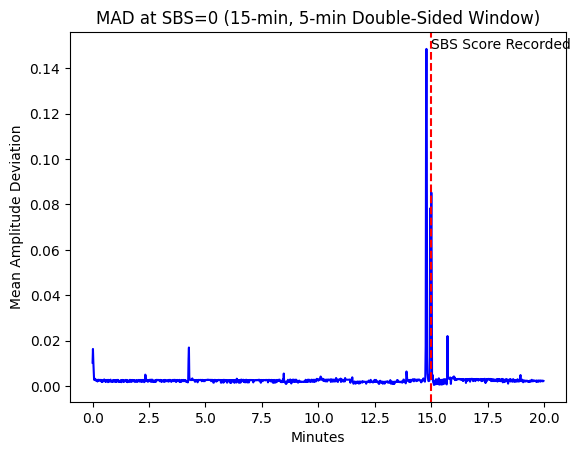

1199


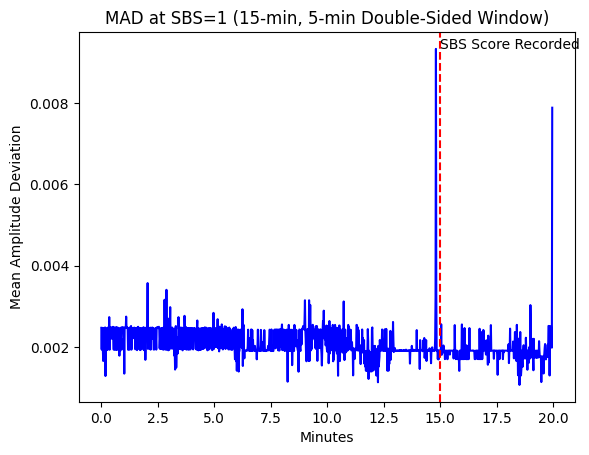

1199


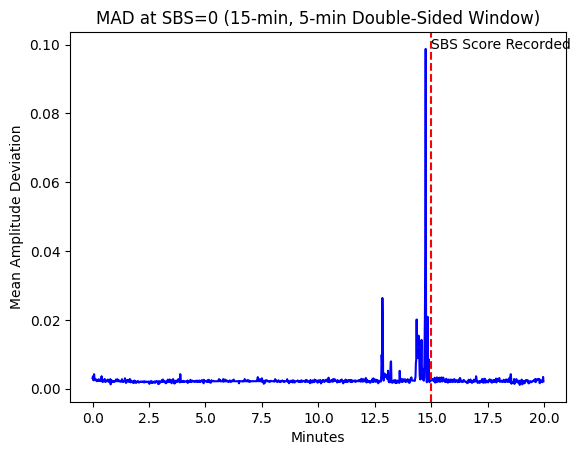

1199


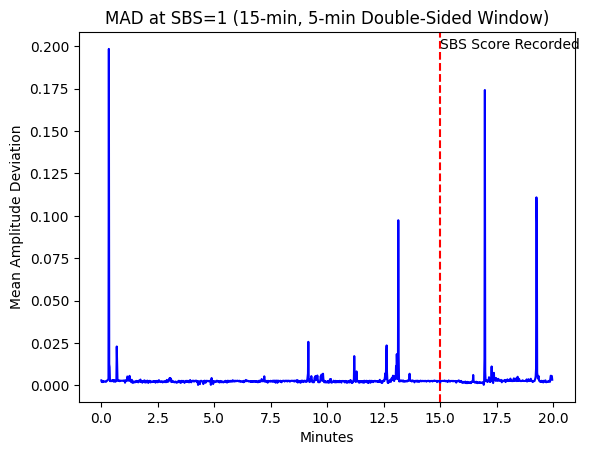

1199


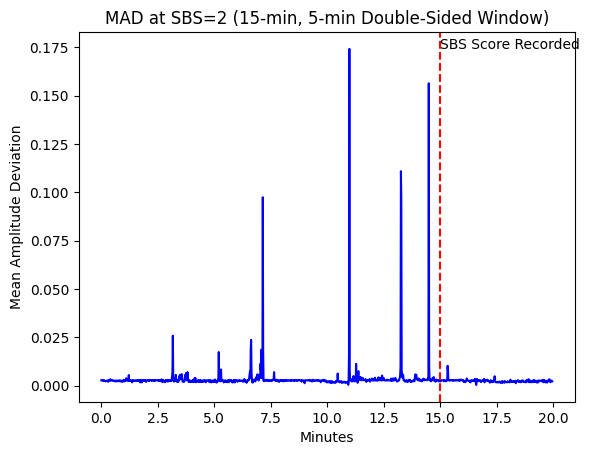

1199


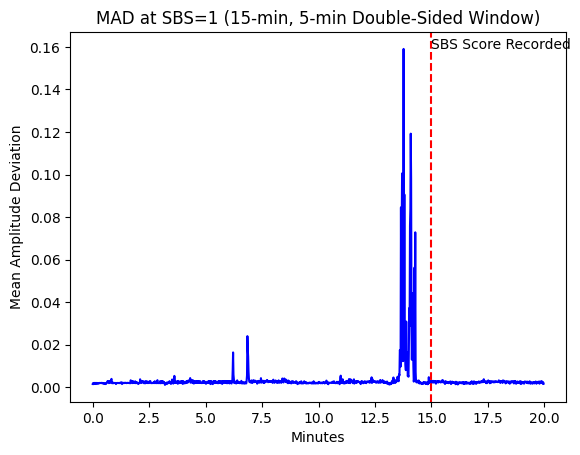

1199


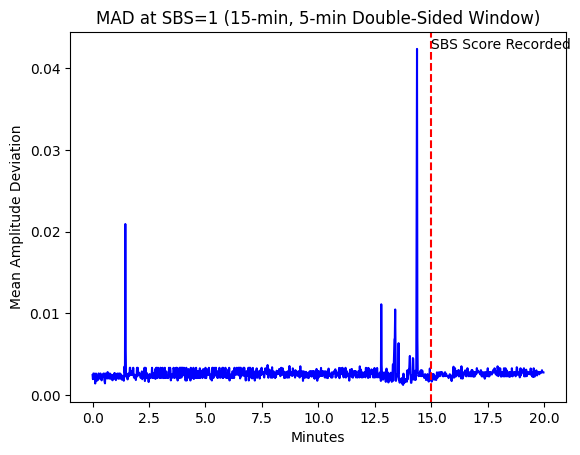

1199


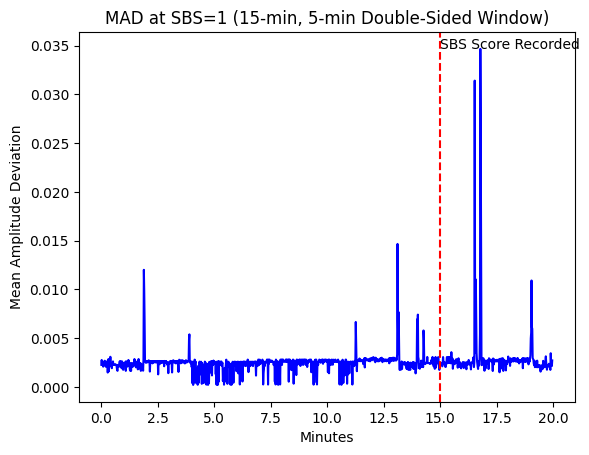

1199


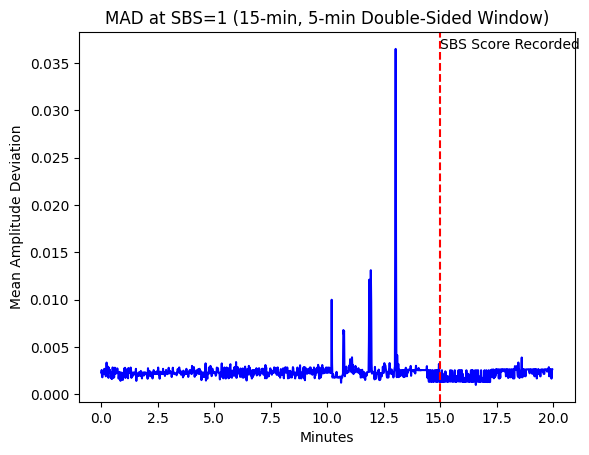

1199


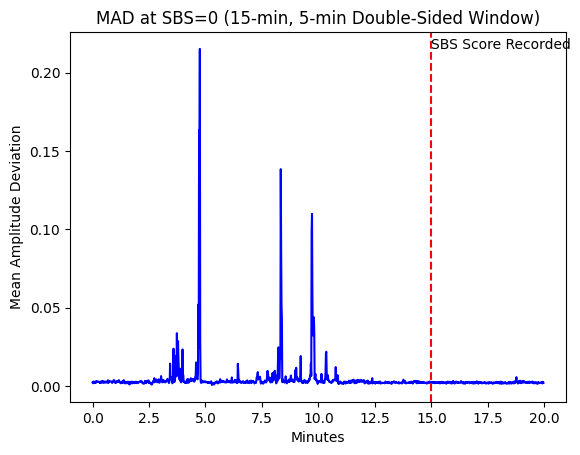

1199


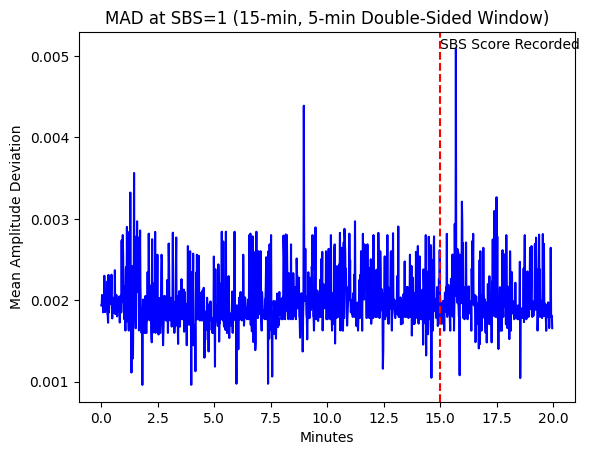

In [129]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline((t[len(t)//2]*1.5), color='red', linestyle='--')
    plt.text((t[len(t)//2]*1.5), max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (15-min, 5-min Double-Sided Window)')
    
    # save plots
    folder_path = './AnalysisResults/Patient9_15MIN_5MIN_DSW'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()